In [132]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display   #for loading and visualizing audio files
import IPython.display as ipd   #to play audio

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import time 
import pickle

# EDA

- Standardize

In [115]:
X = df_DB_pca[df_DB_pca.columns[2:]]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
df_DB_pca_std = pd.DataFrame(data = X_std, columns = df_DB_pca.columns[2:])
df_DB_pca_std['genres_top'] = df_DB_pca.genres_top

In [116]:
subset1_std = df_DB_pca_std[df_DB_pca_std.genres_top.isin(['Hip-Hop','Classical','Rock'])]
subset2_std = df_DB_pca_std[df_DB_pca_std.genres_top.isin(['Pop','Jazz','Folk'])]
subset3_std = df_DB_pca_std[df_DB_pca_std.genres_top.isin(['Electronic','Instrumental','Folk'])]

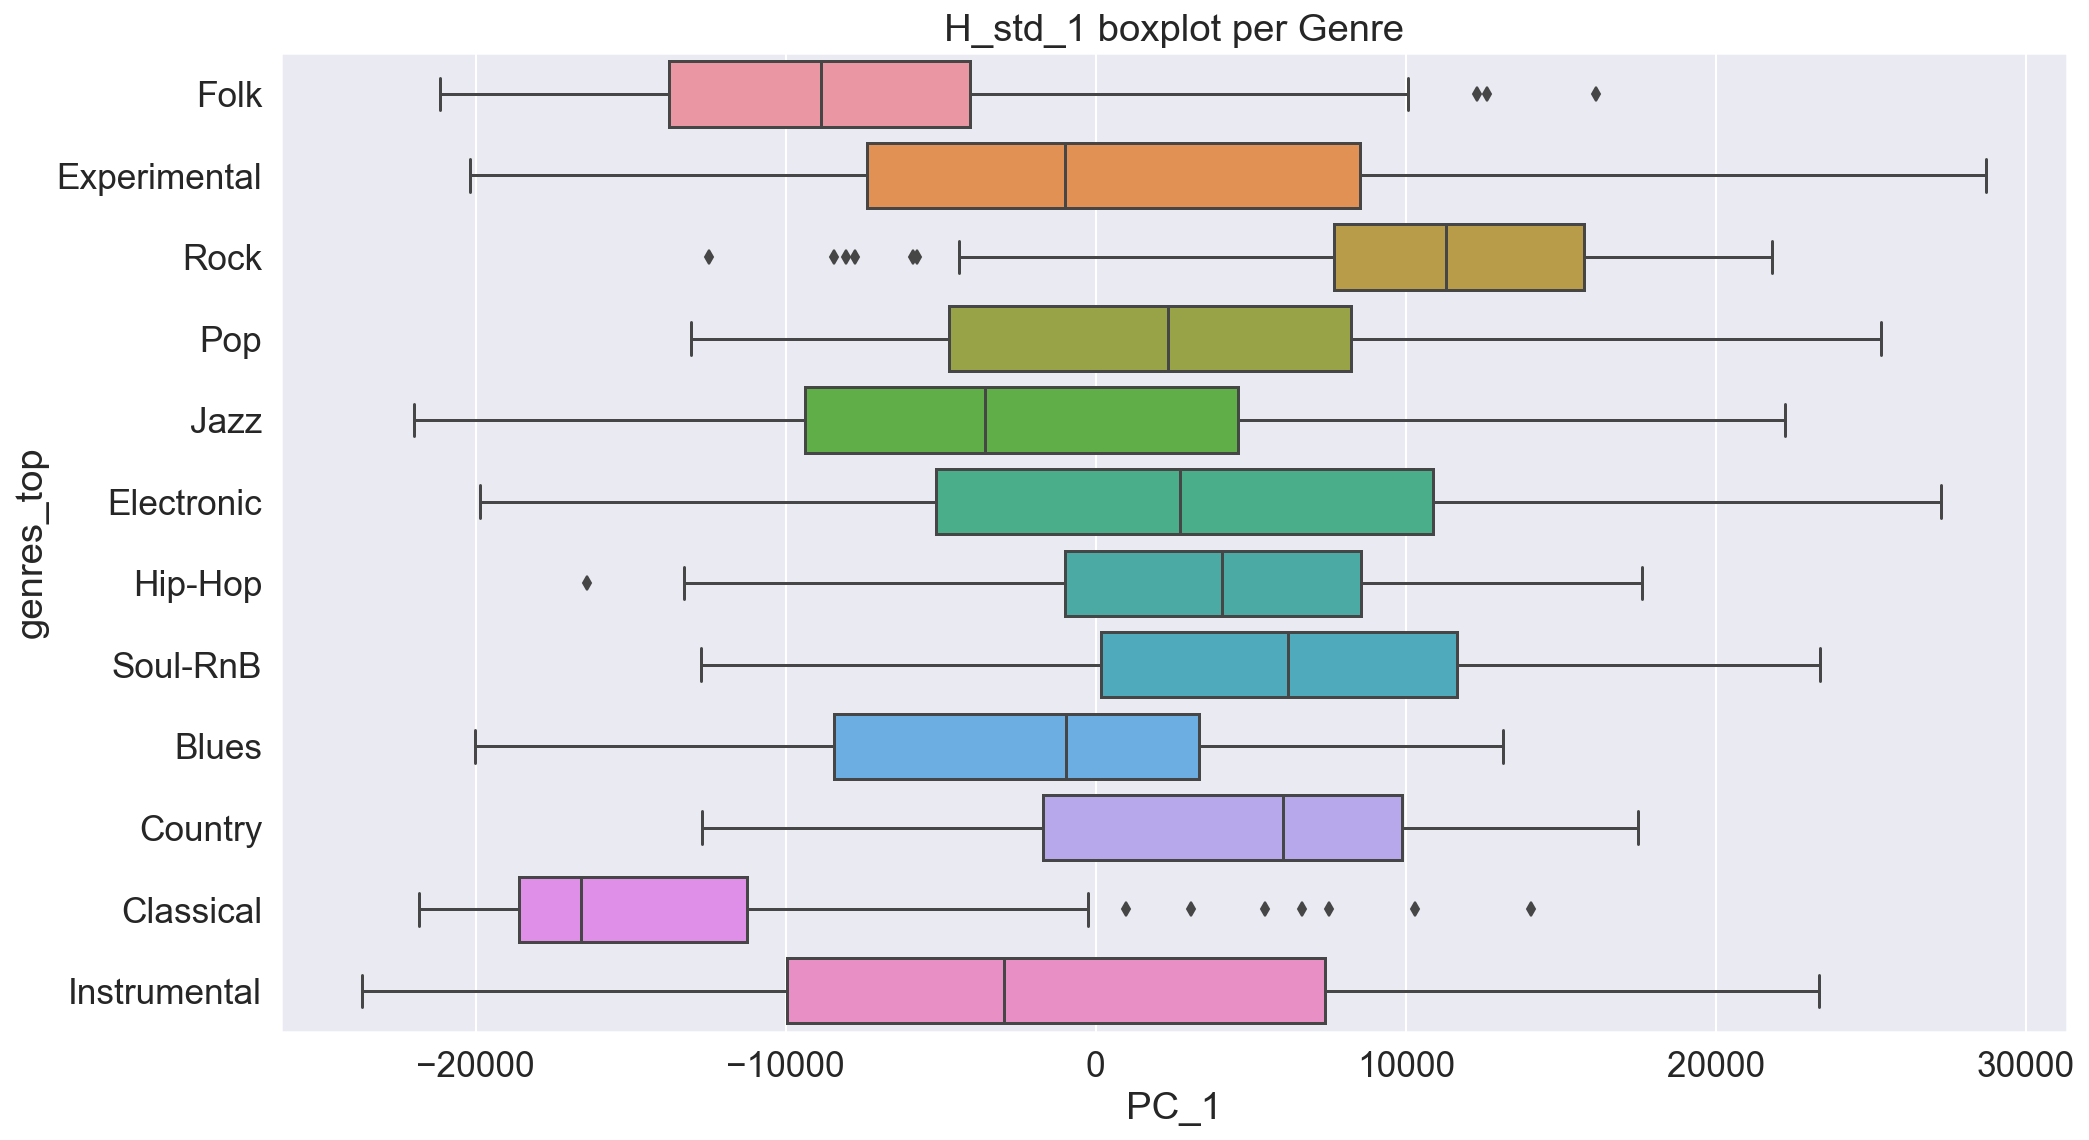

In [121]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x = df_DB_pca.PC_1, y = df_DB_pca.genres_top, ax=ax)
#plt.xticks(rotation=30)
#ax.set(xlim=(-1, 40))
ax.set_title("H_std_1 boxplot per Genre")
sns.set(font_scale = 1.6)
plt.show()

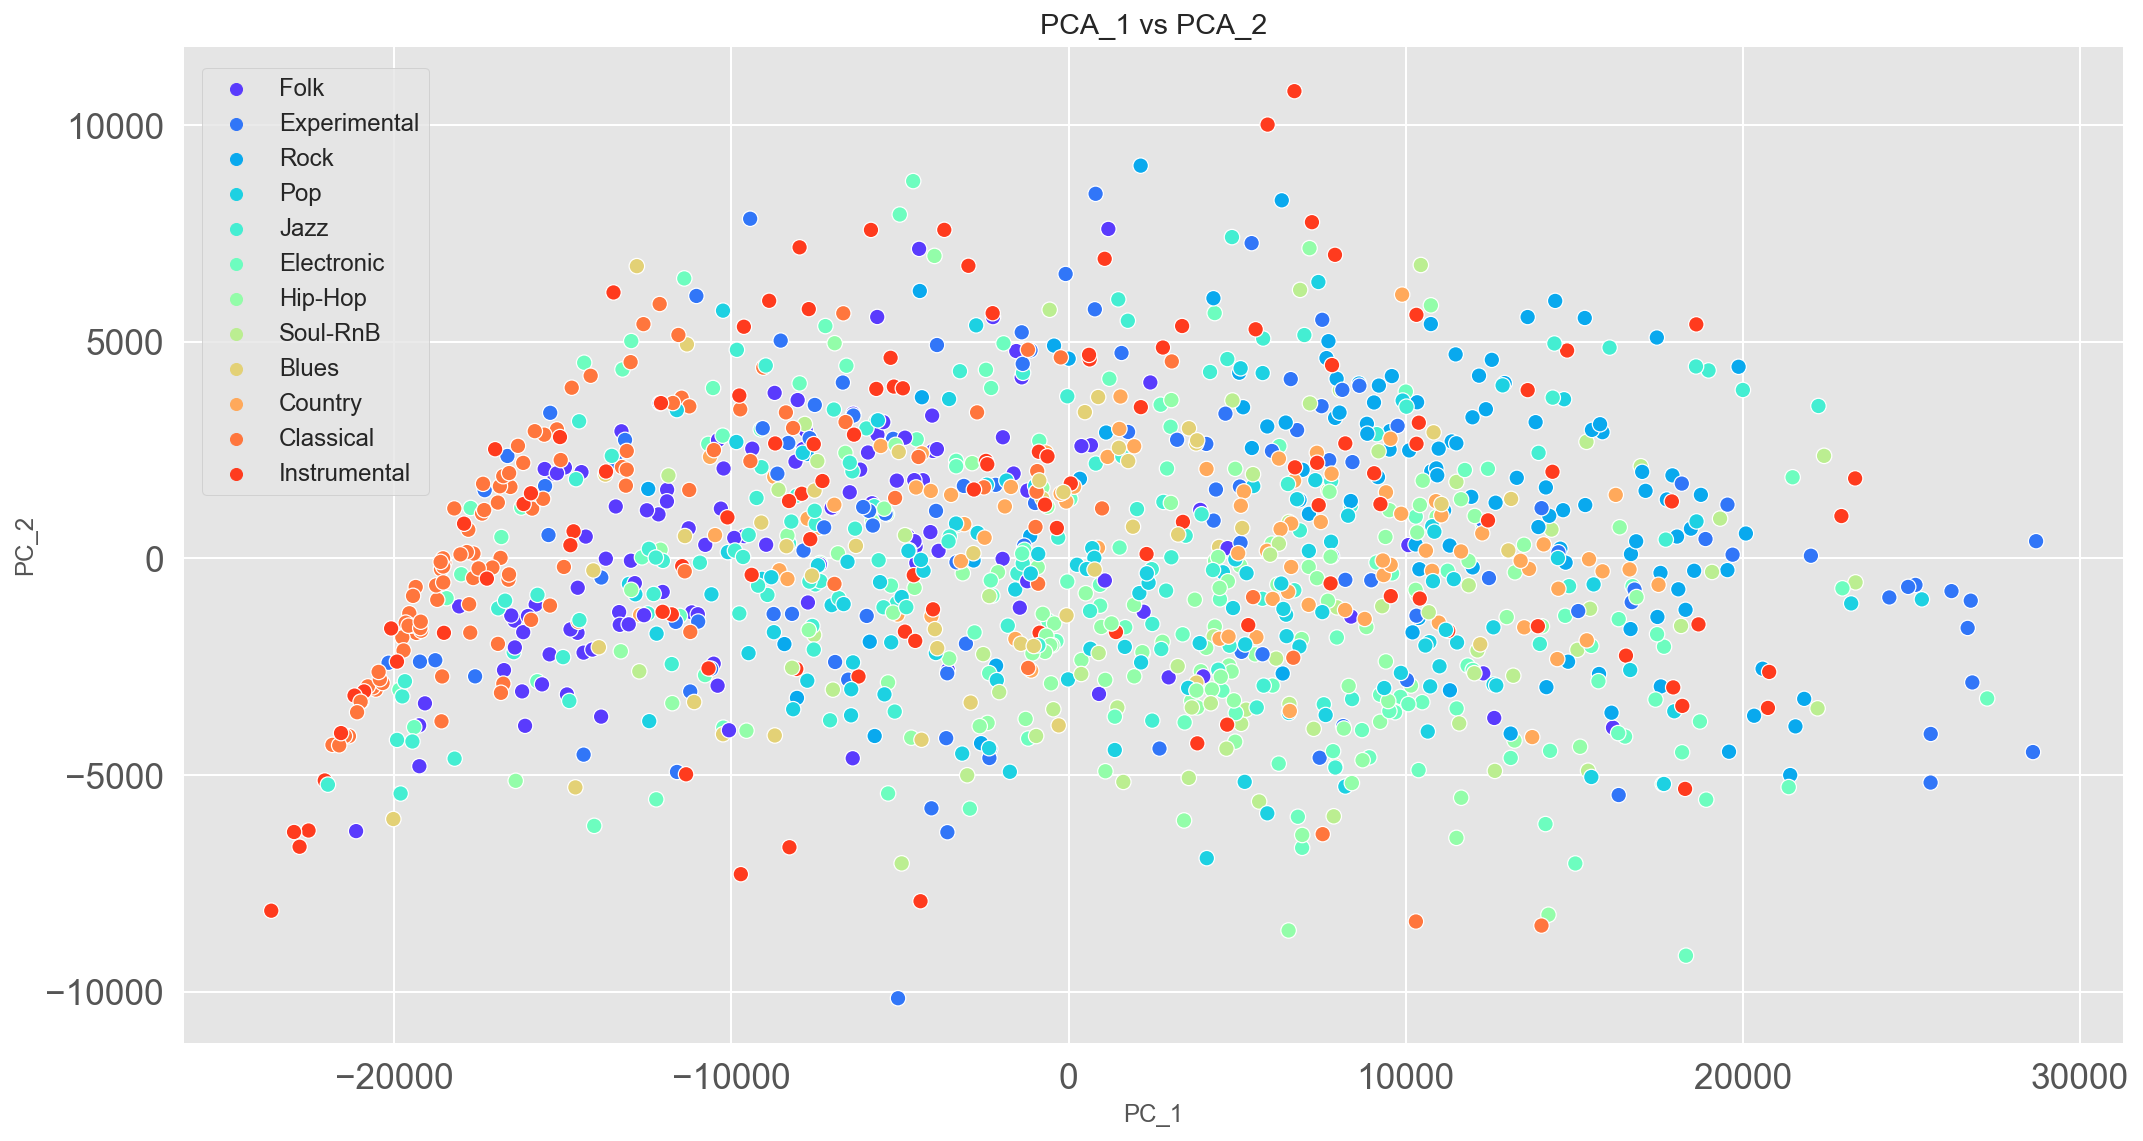

In [162]:
'''current_palette = sns.color_palette('brg_r')
first= current_palette[3]
second = current_palette[0]
third = current_palette[-1]
fourth = current_palette[4]'''

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = df_DB_pca.PC_1, y= df_DB_pca.PC_2, hue = df_DB_pca.genres_top, ax=ax, s = 60, palette = 'rainbow')

ax.set_title("PCA_1 vs PCA_2")
#ax.set(ylim=(0, 10))
#ax.set(xlim=(0, 15))
plt.legend(loc=[0.01, 0.55], fontsize=12)
fig.tight_layout()
plt.show()

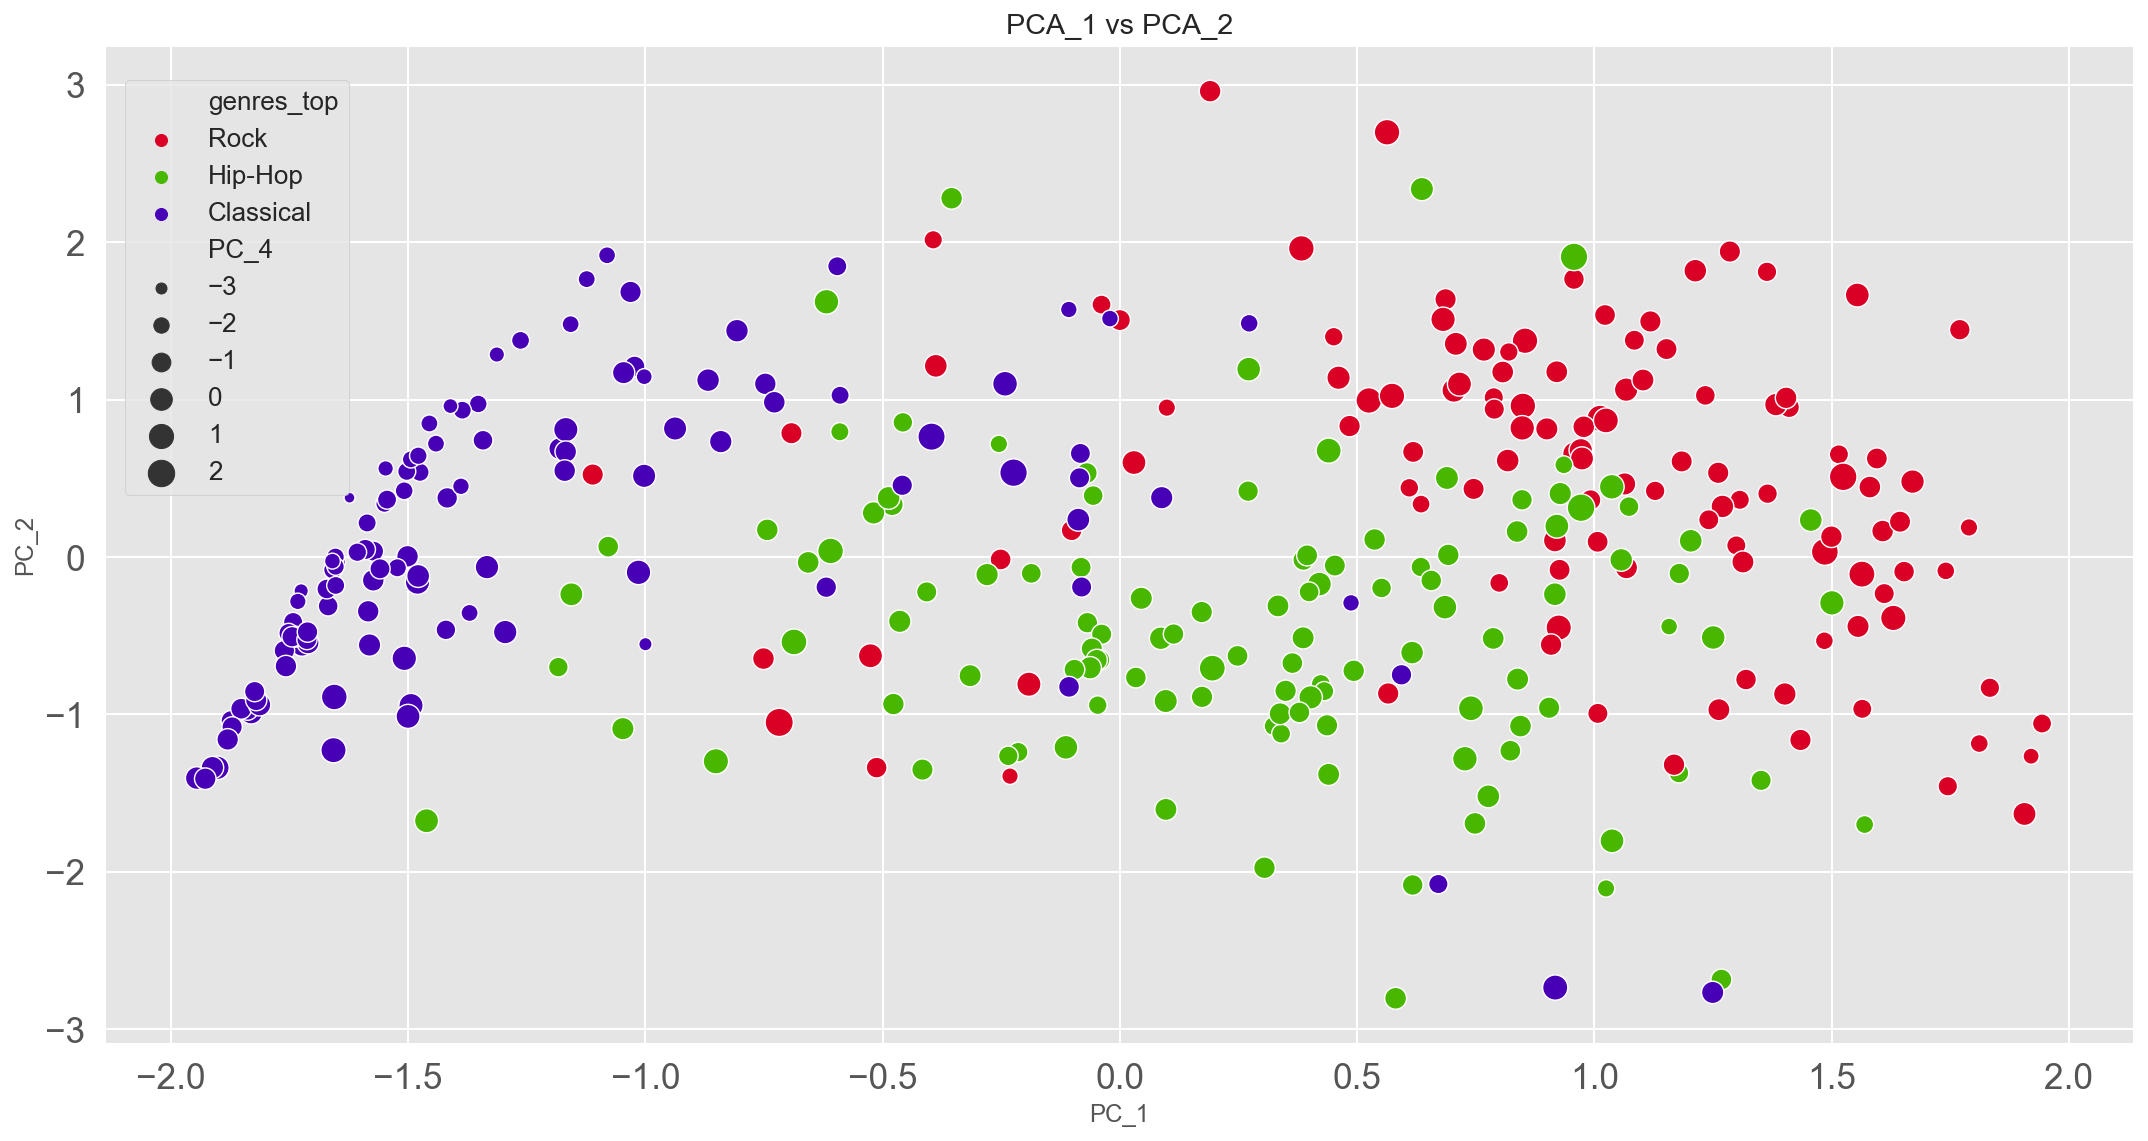

In [155]:
current_palette = sns.color_palette('brg_r')
first= current_palette[3]
second = current_palette[0]
third = current_palette[-1]
fourth = current_palette[4]

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset1_std.PC_1, y= subset1_std.PC_2, hue = subset1_std.genres_top, size = subset1_std.PC_4, 
                sizes = (30, 200), ax=ax, s = 30, palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("PCA_1 vs PCA_2")
#ax.set(ylim=(0, 10))
#ax.set(xlim=(0, 15))
plt.legend(loc=[0.01, 0.55], fontsize=13)
fig.tight_layout()
plt.show()

In [129]:
import seaborn as sns

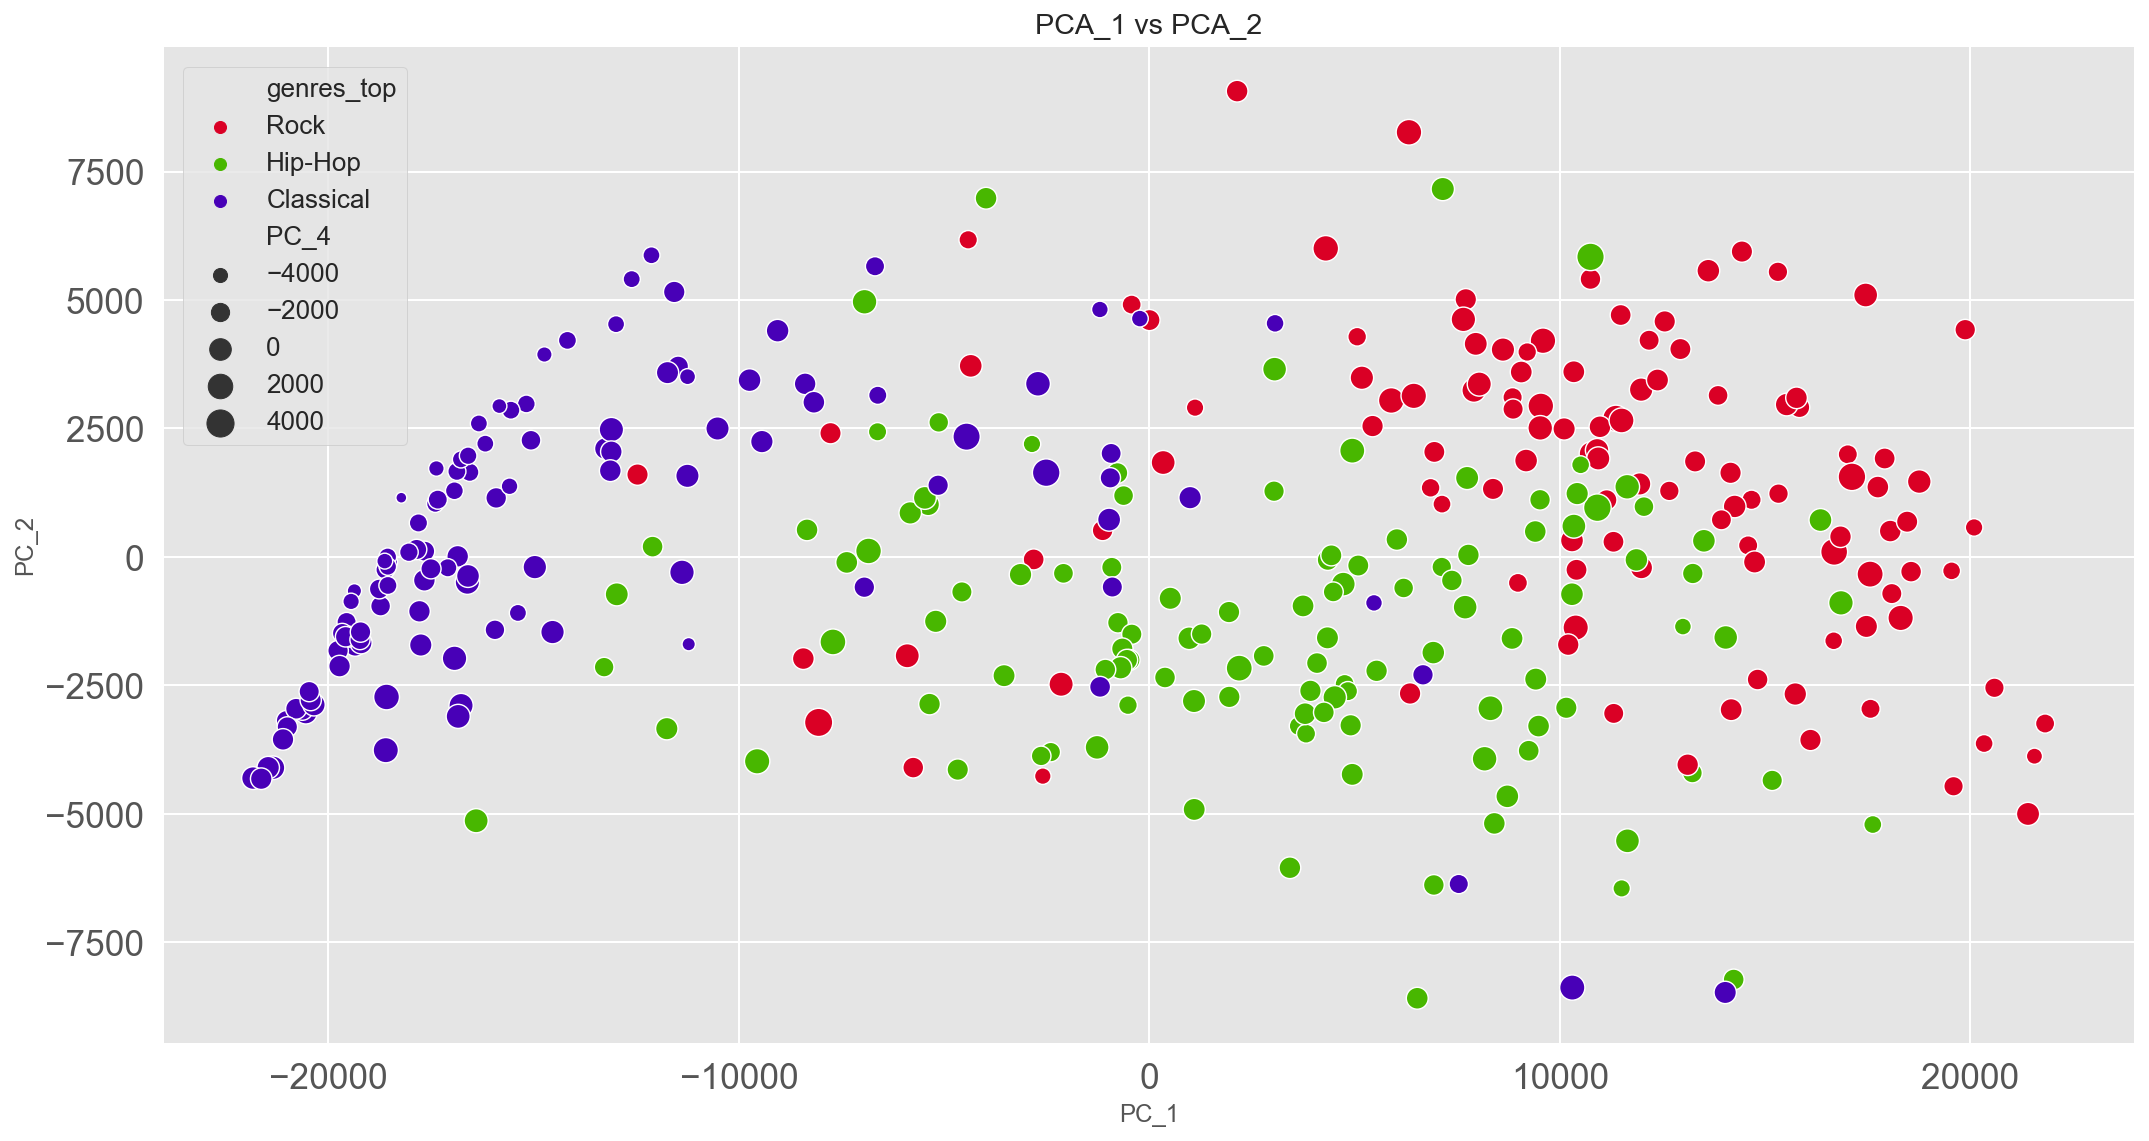

In [152]:
current_palette = sns.color_palette('brg_r')
first= current_palette[3]
second = current_palette[0]
third = current_palette[-1]
fourth = current_palette[4]

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset1.PC_1, y= subset1.PC_2, hue = subset1.genres_top, size = subset1.PC_4, 
                sizes = (30, 200), ax=ax, s = 30, palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("PCA_1 vs PCA_2")

#plt.legend(loc='upper left')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=[0.01, 0.6], fontsize=13)
#ax.set(ylim=(0, 10))
#ax.set(xlim=(0, 15))
fig.tight_layout()
plt.show()

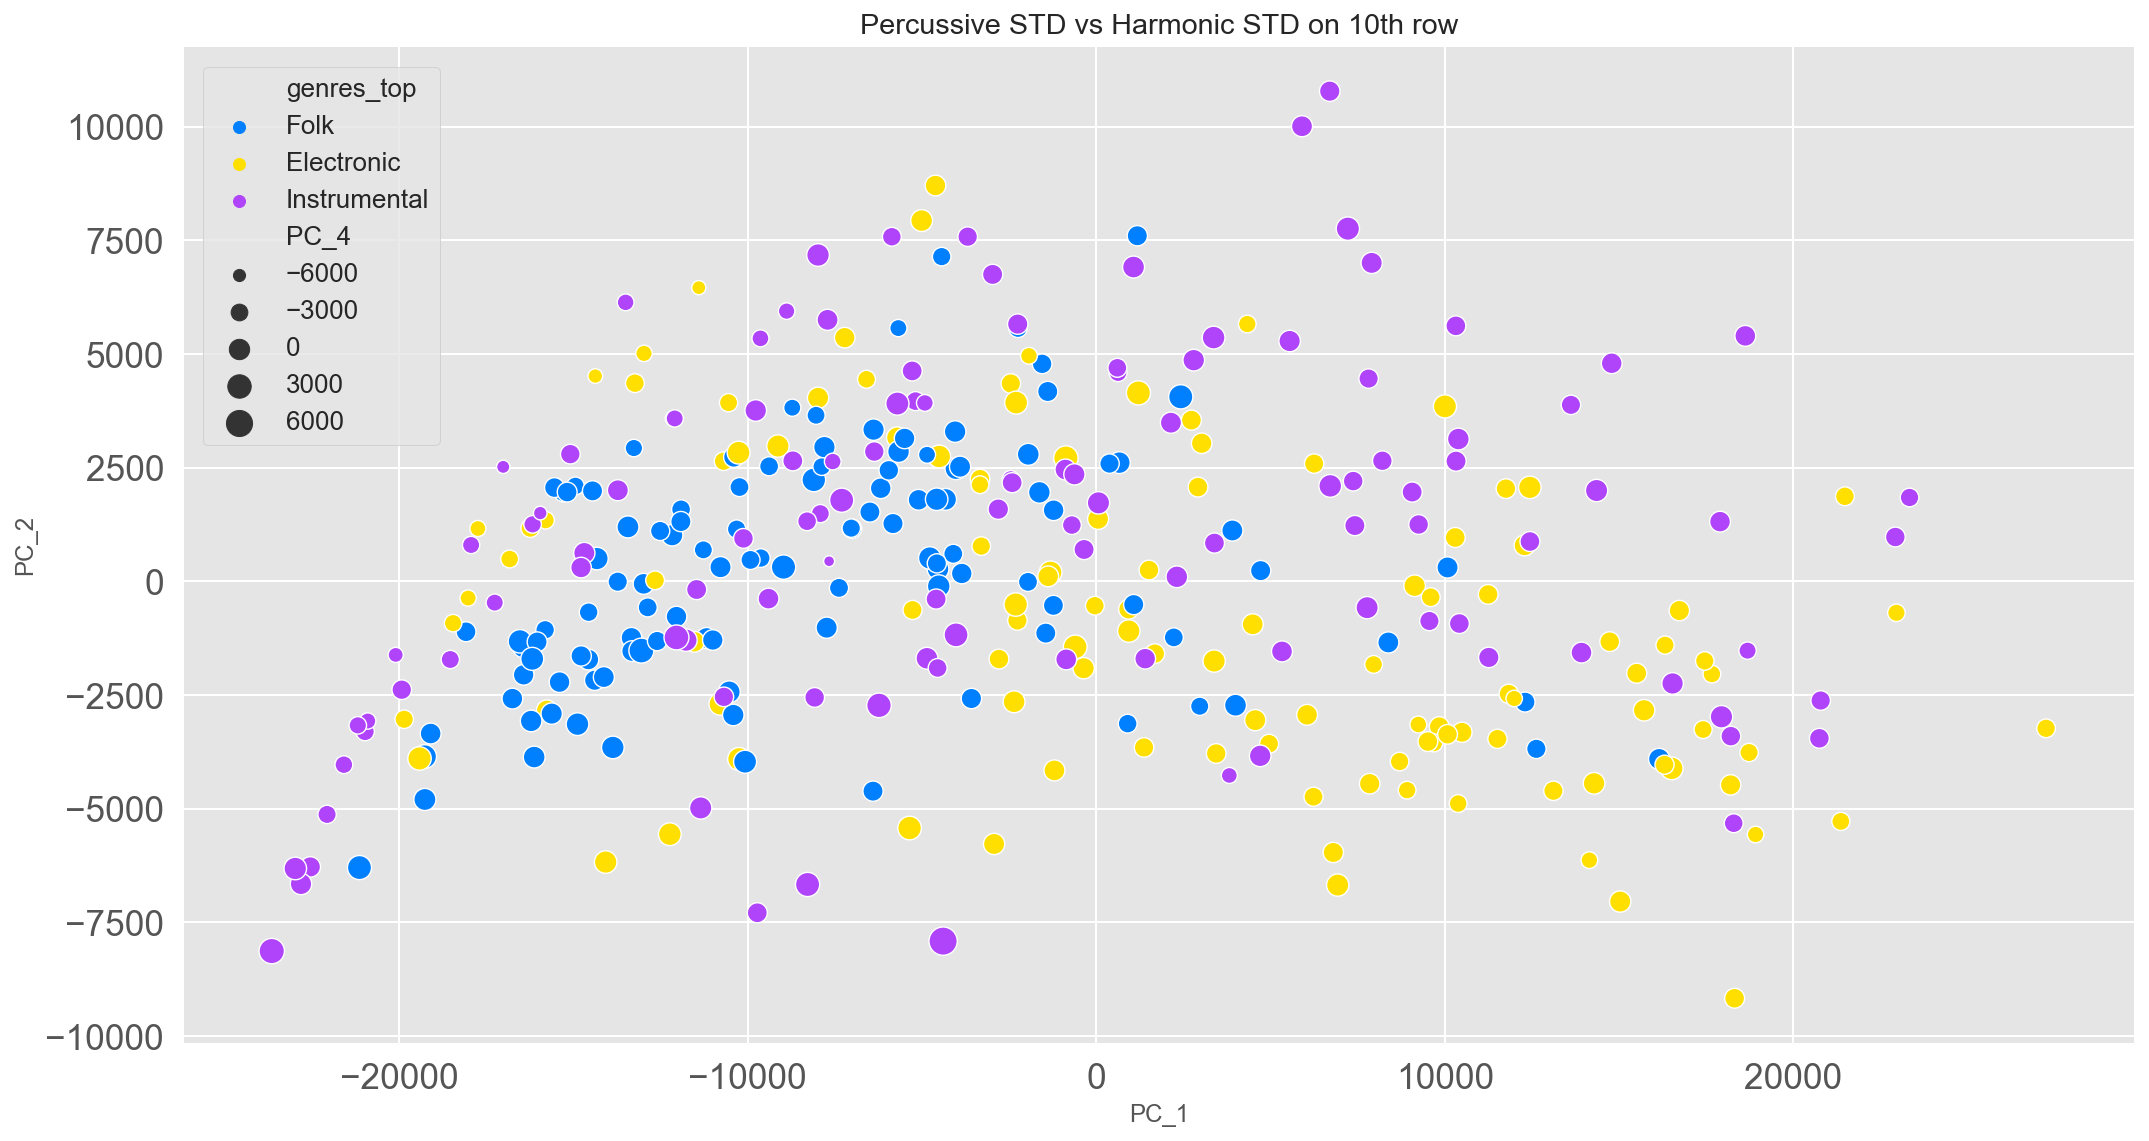

In [153]:
current_palette = sns.color_palette('gist_ncar')
first= current_palette[0]
second = current_palette[3]
third = current_palette[-1]
fourth = current_palette[4]

#sns.set()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset3.PC_1, y= subset3.PC_2, hue = subset3.genres_top, size = subset3.PC_4, sizes = (30, 200), 
                ax=ax, s = 30, palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
#ax.set(ylim=(0, 10))
#ax.set(xlim=(0, 15))
plt.legend(loc=[0.01, 0.6], fontsize=13)
fig.tight_layout()
plt.show()

In [97]:
df_DB_pca

,track_id,genres_top,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,...,PC_991,PC_992,PC_993,PC_994,PC_995,PC_996,PC_997,PC_998,PC_999,PC_1000
0,000139,Folk,10078.040039,306.597321,-3034.967773,806.417053,13.430355,808.089050,-414.565552,-127.220505,...,1.852397,8.823978,48.225185,-32.082897,140.478104,56.710449,19.255308,-46.259407,49.222427,-43.808361
1,000140,Folk,-6403.381348,-4613.407715,-3237.626221,-107.894600,991.465210,-990.849182,1800.114258,1102.489380,...,-67.657242,-487.661316,34.751194,-235.312714,254.310287,-162.107468,-192.955566,185.439606,-161.606705,146.136658
2,000141,Folk,-7731.916992,-1018.027344,-8754.224609,816.567688,1607.343018,1082.048706,-1097.193604,-1831.873169,...,-108.332344,-0.715170,121.278961,-204.109909,48.674000,44.526928,-120.469177,-57.844471,-84.828087,220.603638
3,000148,Experimental,7504.065430,3512.296387,-259.968964,-768.068542,1485.589355,-488.783478,2508.389404,-1033.721069,...,-578.482300,118.543877,361.266205,-42.397144,45.313126,-492.610931,-186.842224,648.584900,-391.695404,-392.097137
4,000181,Rock,9588.051758,4207.545898,256.408966,2822.379639,-101.647354,-1707.434937,-1134.129028,-469.481415,...,106.800850,-7.794832,117.390495,168.896835,149.696198,67.292862,7.928970,-62.200504,-218.686752,-209.174301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,050884,Soul-RnB,-961.977234,-4098.980957,-663.235779,829.122498,111.717331,-1092.054688,-11.251274,227.515320,...,-36.803234,-33.601402,-182.236755,-88.640892,20.194267,16.441891,-130.043655,55.674656,49.914406,14.078464
1229,050888,Blues,-13932.639648,-2050.514648,-123.263474,698.554077,53.517849,-1858.130371,82.079948,-490.642151,...,-381.680176,211.246765,-91.542191,225.619492,-84.302872,-281.304749,-241.473602,-260.557251,-203.585220,40.231125
1230,050890,Blues,-3966.310547,-1633.902222,-466.304474,908.756775,297.386566,-2502.949951,-245.106247,-410.760010,...,-693.199707,-286.221802,141.524216,-488.048676,428.603333,-360.900696,-403.693085,-156.619171,-387.915710,-210.799606
1231,050891,Blues,-14629.565430,-5284.936523,-52.734085,-997.784668,288.935028,-2519.699951,-426.311981,10.661394,...,-55.991650,43.807926,-70.655464,-524.872620,-202.241287,89.555557,-148.752243,-380.165619,-231.353165,-124.517159


In [ ]:
current_palette = sns.color_palette('gist_ncar')
first= current_palette[0]
second = current_palette[3]
third = current_palette[-1]
fourth = current_palette[4]



#sns.set()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset3.PC_1, y= subset3.PC_2, hue = subset3.genres_top, size = subset3.PC_4, sizes = (30, 200), 
                ax=ax, s = 30, palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
#ax.set(ylim=(0, 10))
#ax.set(xlim=(0, 15))
fig.tight_layout()
plt.show()